# Estimación de la Inflación con ML

## EDA

In [1]:
#Importación de librerías

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import get_scorer_names, mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
import lightgbm as lgb
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.style.use('ggplot')

## Construcción de Sábana Analítica

In [2]:
#Importación de insumos

sabana_analitica = pd.read_csv('../sabana_analitica.csv', index_col = 'Periodo')
sabana_analitica.dropna(inplace = True)
sabana_analitica = sabana_analitica.iloc[:180,:]

In [3]:
# División de sábana entre train y test

train = sabana_analitica.iloc[:-24]
test = sabana_analitica[-24:]

## Análisis Exploratorio de Datos

### Análisis descriptivo general

<function matplotlib.pyplot.show(close=None, block=None)>

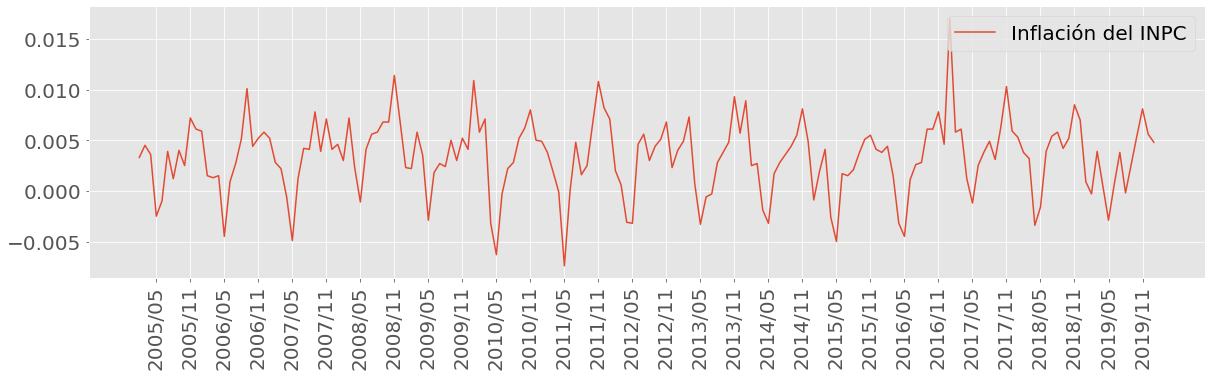

In [5]:
fig, ax = plt.subplots()

fig.set_figwidth(20)  # Ancho de la figura en pulgadas
fig.set_figheight(5)

ax.plot(sabana_analitica.index, sabana_analitica['inpc'], label = 'Inflación del INPC')

ax.set_xticks(np.arange(3, len(sabana_analitica.index), 6))

ax.legend(loc = 'upper right', fontsize = 20)

plt.yticks(fontsize = 20)
plt.xticks(rotation=90, fontsize = 20)

plt.savefig('inflacion_INPC.png', bbox_inches='tight')

plt.show

In [309]:
sabana_analitica.iloc[:,:13].describe()

,inpc,inpc-1,inpc-2,inpc-3,inpc-4,inpc-5,inpc-6,inpc-7,inpc-8,inpc-9,inpc-10,inpc-11,inpc-12
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.003354,0.003328,0.003308,0.003311,0.003319,0.003351,0.003386,0.003379,0.003385,0.003387,0.003393,0.003390,0.003425
std,0.003596,0.003603,0.003600,0.003603,0.003610,0.003629,0.003625,0.003625,0.003622,0.003618,0.003614,0.003614,0.003609
min,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400,-0.007400
25%,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001500,0.001575,0.001575,0.001575,0.001575,0.001600
50%,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800,0.003800
75%,0.005525,0.005525,0.005500,0.005500,0.005525,0.005600,0.005625,0.005625,0.005625,0.005625,0.005625,0.005625,0.005725
max,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000,0.017000


In [289]:
sabana_analitica.iloc[:,13:25].describe()

,suby-1,suby-2,suby-3,suby-4,suby-5,suby-6,suby-7,suby-8,suby-9,suby-10,suby-11,suby-12
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.002968,0.002961,0.002962,0.002964,0.002979,0.002984,0.002979,0.002977,0.002981,0.002974,0.002976,0.002977
std,0.001380,0.001378,0.001377,0.001377,0.001392,0.001390,0.001393,0.001393,0.001390,0.001385,0.001386,0.001387
min,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300,-0.000300
25%,0.002000,0.002000,0.002000,0.002000,0.002000,0.002075,0.002000,0.002000,0.002075,0.002075,0.002075,0.002075
50%,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800,0.002800
75%,0.003925,0.003900,0.003900,0.003900,0.003925,0.003925,0.003925,0.003925,0.003925,0.003900,0.003900,0.003900
max,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500,0.008500


In [290]:
sabana_analitica.iloc[:,25:45].describe()

,ipp,act_enom_global,actividades_primarias,actividad_industrial,vol_fisico_constr,actividades_terciarias,inversion_fija_bruta,desocupacion_urbana,tend_empleo_manuf,asegurados_perms_imss,expectativa_personal_ocupado,imports_totales,imports_n_petroleras,exports_petroleras,exports_n_petroleras,precio_prom_crudo,tasa_interbancaria_eq,cetes_28,tasa_fondeo_gub,tipo_cambio_nominal
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.003601,0.001829,0.017083,0.000913,0.002695,0.002434,0.003377,5.123423,-0.155556,1.408791e+07,51.425183,29052.032439,26152.793539,3113.343356,25375.231861,66.774111,6.164111,5.706722,5.796611,0.003353
std,0.004113,0.031027,0.181698,0.031584,0.058361,0.033958,0.063429,0.940346,8.438289,1.874359e+06,2.122845,6619.155814,5803.021016,1084.454465,6876.178007,24.015766,1.989682,1.997067,1.914515,0.027480
min,-0.006575,-0.085820,-0.315684,-0.084636,-0.177848,-0.098599,-0.201970,3.503677,-29.000000,1.138328e+07,41.343000,15271.701000,14239.296000,1074.508000,12139.285000,23.910000,3.290000,2.670000,3.020000,-0.084828
25%,0.001105,-0.019807,-0.123085,-0.019890,-0.030076,-0.020707,-0.019856,4.337644,-5.250000,1.251851e+07,50.725500,23717.940750,21210.435500,2225.937750,19167.595000,47.742500,4.760000,4.110000,4.400000,-0.011364
50%,0.003700,-0.001162,-0.010793,-0.003248,0.005959,0.001638,0.013264,5.062725,1.000000,1.363750e+07,51.962000,30140.388000,26626.736500,2960.164000,26008.417500,60.210000,5.560000,5.220000,5.280000,-0.000532
75%,0.005531,0.020677,0.137858,0.018242,0.045853,0.025270,0.043666,5.853406,6.000000,1.556357e+07,52.672250,33918.722750,30685.150000,3843.502750,30533.456250,90.687500,7.930000,7.440000,7.452500,0.013770
max,0.020770,0.088338,0.601976,0.094443,0.129771,0.094832,0.118013,7.907580,19.000000,1.780550e+07,54.152000,44290.891000,39073.704000,5931.857000,39180.124000,120.250000,10.120000,9.750000,9.400000,0.179622


In [291]:
sabana_analitica.iloc[:,45:].describe()

,tipo_cambio_real_multi,indice_bmv,reservas_internacionales,confianza_empresarial,indicador_agregado_tend,indicador_pedidos_manuf,confianza_consumidor,expectativa_uso_pye,expectativa_inventarios_insumos,indice_prod_ind_eua,prod_manuf_eua,comercio_pmenor_eua,desempleo_eua,tasa_bonos_tesoro_eua,sp500,dow_jones,confianza_consumidor_eua
count,180.000000,180.000000,1.800000e+02,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,0.000820,0.004514,2.005687e+06,52.388289,57.246128,54.015894,39.054607,52.148944,52.704706,0.000765,0.000614,365540.516667,6.106111,2.979333,0.006047,0.006150,0.001517
std,0.025250,0.046226,1.037771e+06,5.199129,3.201100,2.241443,3.532032,4.371729,2.178238,0.016242,0.021046,55231.919352,2.013062,1.003711,0.034689,0.038011,0.052610
min,-0.077065,-0.184097,6.292425e+05,32.782000,45.682000,45.513000,28.667872,34.292000,44.356000,-0.050038,-0.059885,263469.000000,3.300000,1.500000,-0.203951,-0.140605,-0.180654
25%,-0.013785,-0.022622,9.098885e+05,50.242500,55.587250,52.980250,36.711274,50.494000,51.862250,-0.009889,-0.011396,321383.000000,4.500000,2.170000,-0.006947,-0.013765,-0.025278
50%,-0.000024,0.005880,2.054387e+06,53.203000,57.851000,54.272000,38.404925,52.555000,53.068000,-0.001106,0.000500,354512.000000,5.250000,2.720000,0.013330,0.008266,0.000000
75%,0.013920,0.035367,3.088286e+06,56.122750,59.071000,55.354000,41.915225,54.130500,54.299000,0.010178,0.014870,404874.250000,7.825000,3.730000,0.026769,0.027629,0.032235
max,0.134191,0.127257,3.640181e+06,59.789000,67.486000,60.365000,47.826150,75.124000,57.074000,0.036650,0.050163,529345.000000,10.600000,5.110000,0.120217,0.095445,0.136126


### Coeficiente de variación

In [292]:
cv = sabana_analitica.std() / sabana_analitica.mean() * 100

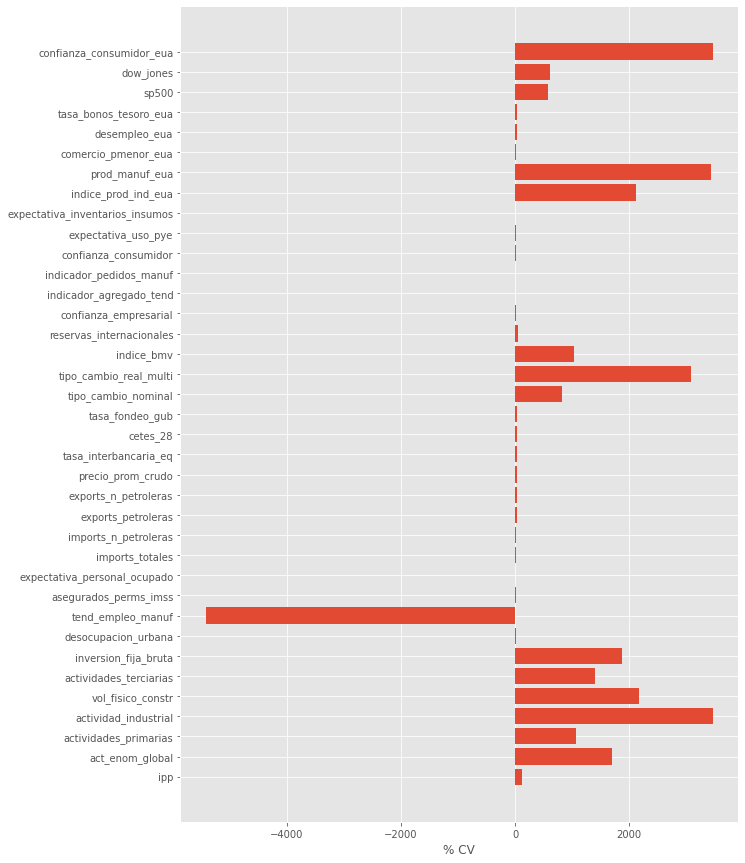

In [293]:
#Gráfica de Coeficientes de Ind. Macroeconómicos

fig, ax = plt.subplots()

ax.barh(cv.iloc[25:].index, cv.iloc[25:])
ax.set_xlabel("% CV")

fig.set_figwidth(10)  # Ancho de la figura en pulgadas
fig.set_figheight(15)

plt.savefig('cv_macro.png', bbox_inches='tight')

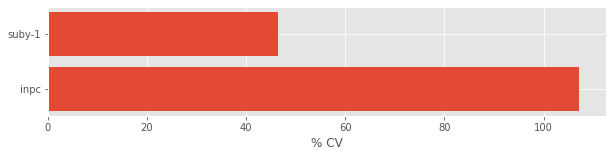

In [277]:
#Gráfica de Coeficientes de Ind. Macroeconómicos

fig, ax = plt.subplots(figsize=(10, 2))

ax.barh(cv.loc[['inpc','suby-1']].index, cv.loc[['inpc','suby-1']])
ax.set_xlabel("% CV")

#fig.set_figwidth(10)  # Ancho de la figura en pulgadas
#fig.set_figheight(15)

plt.savefig('cv_inf.png')

### Correlación de los datos

Variables macroeconómicas

In [7]:
sabana_analitica_macro = sabana_analitica.drop(['inpc-1','inpc-2','inpc-3','inpc-4',
                                                'inpc-5','inpc-6','inpc-7','inpc-8',
                                                'inpc-9','inpc-10','inpc-11','inpc-12',
                                                'suby-1','suby-2','suby-3','suby-4',
                                                'suby-5','suby-6','suby-7','suby-8',
                                                'suby-9','suby-10','suby-11','suby-12'],
                                               axis = 1)

In [8]:
pearson_macro = sabana_analitica_macro.corr(method = 'pearson')
spearman_macro = sabana_analitica_macro.corr(method = 'spearman')

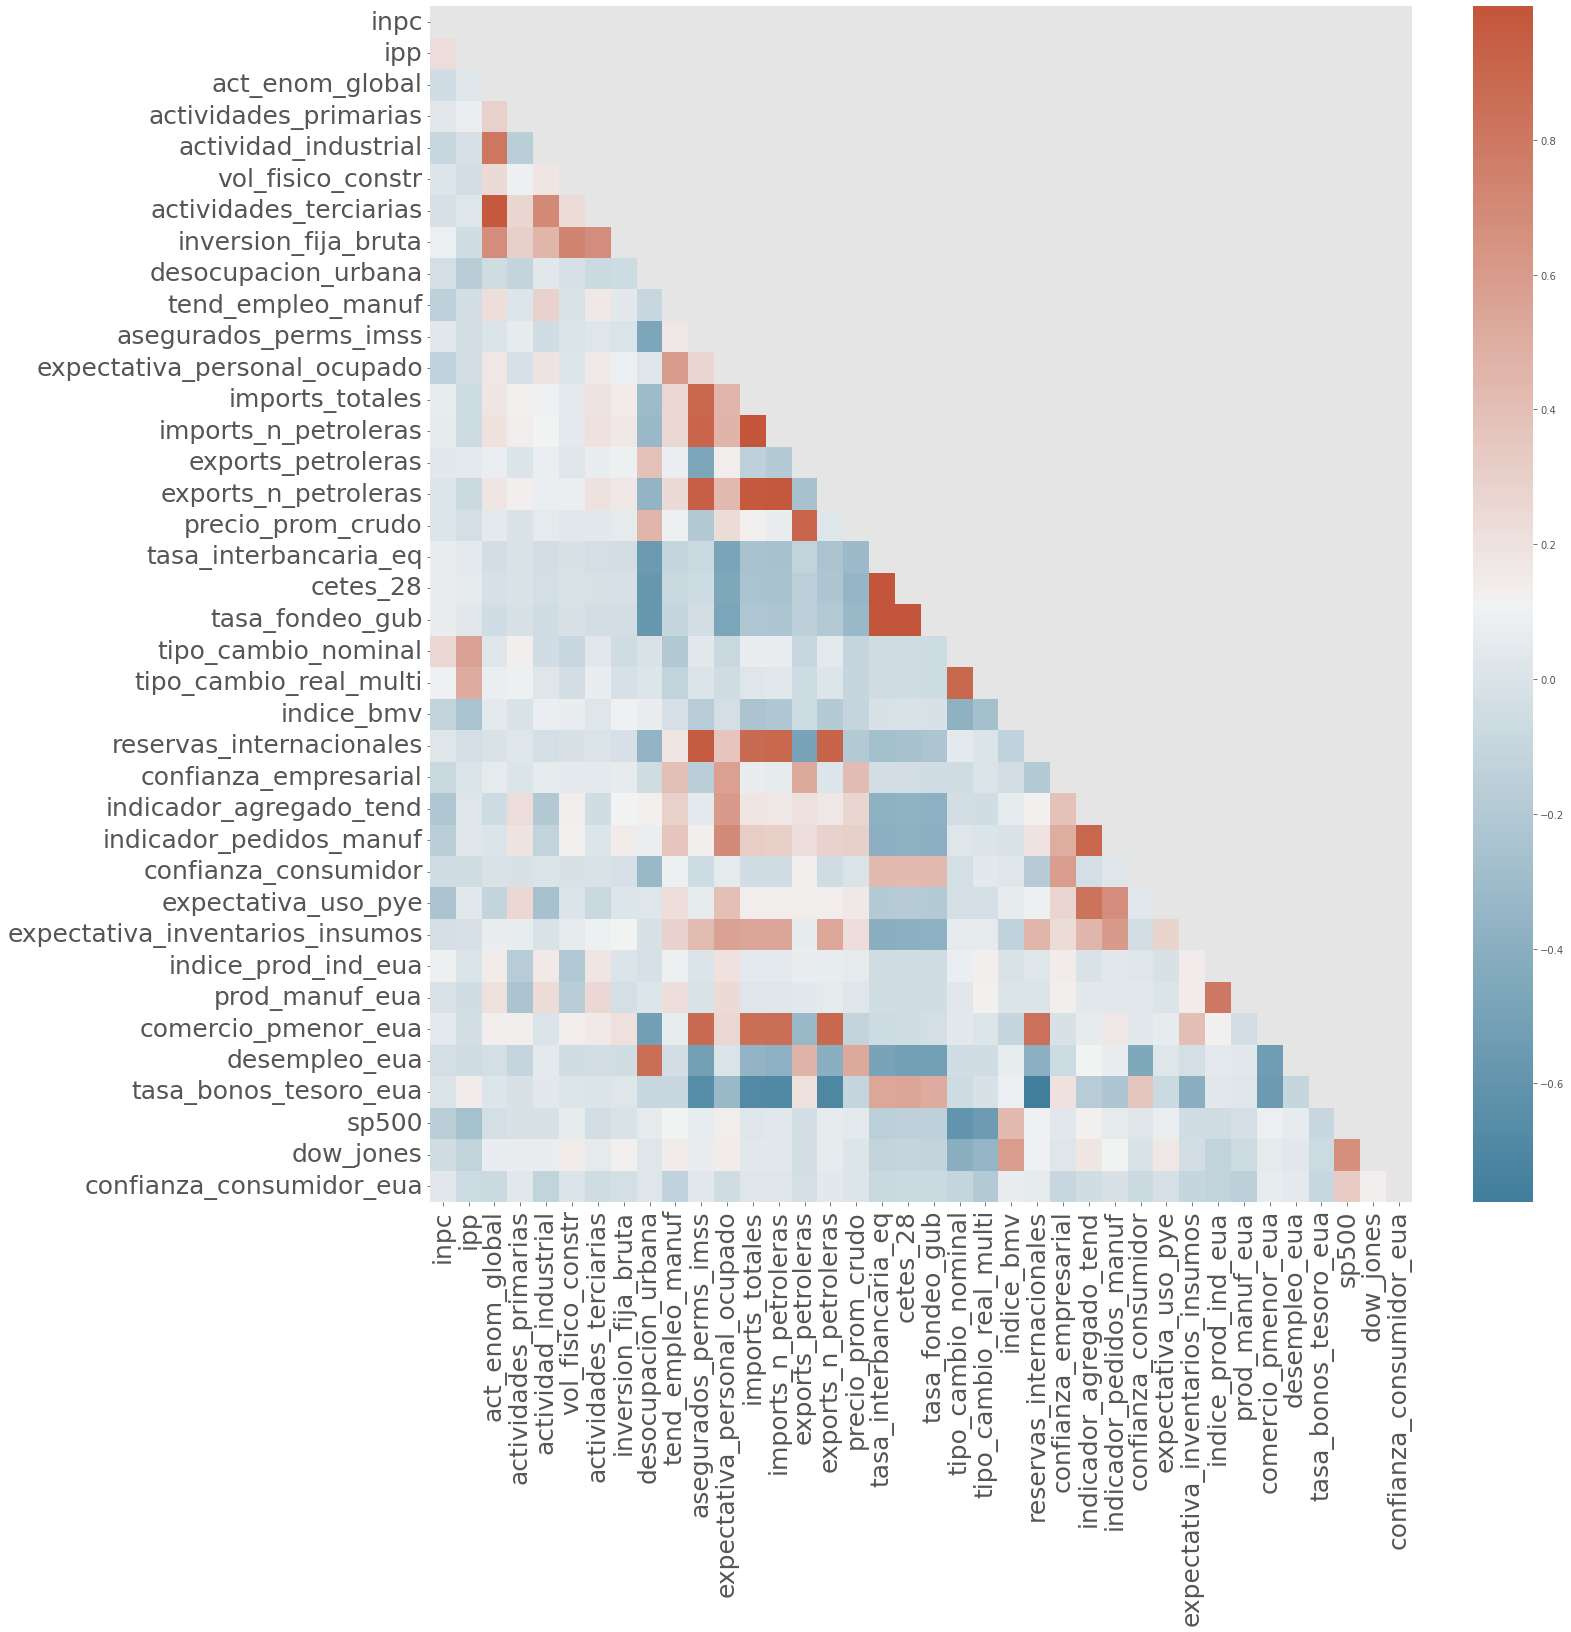

In [10]:
fig, ax = plt.subplots(figsize=(22, 22))

# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(pearson_macro, dtype=bool))

# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(pearson_macro, annot=False, mask = mask, cmap=cmap)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('pearson_macro.png', bbox_inches='tight')

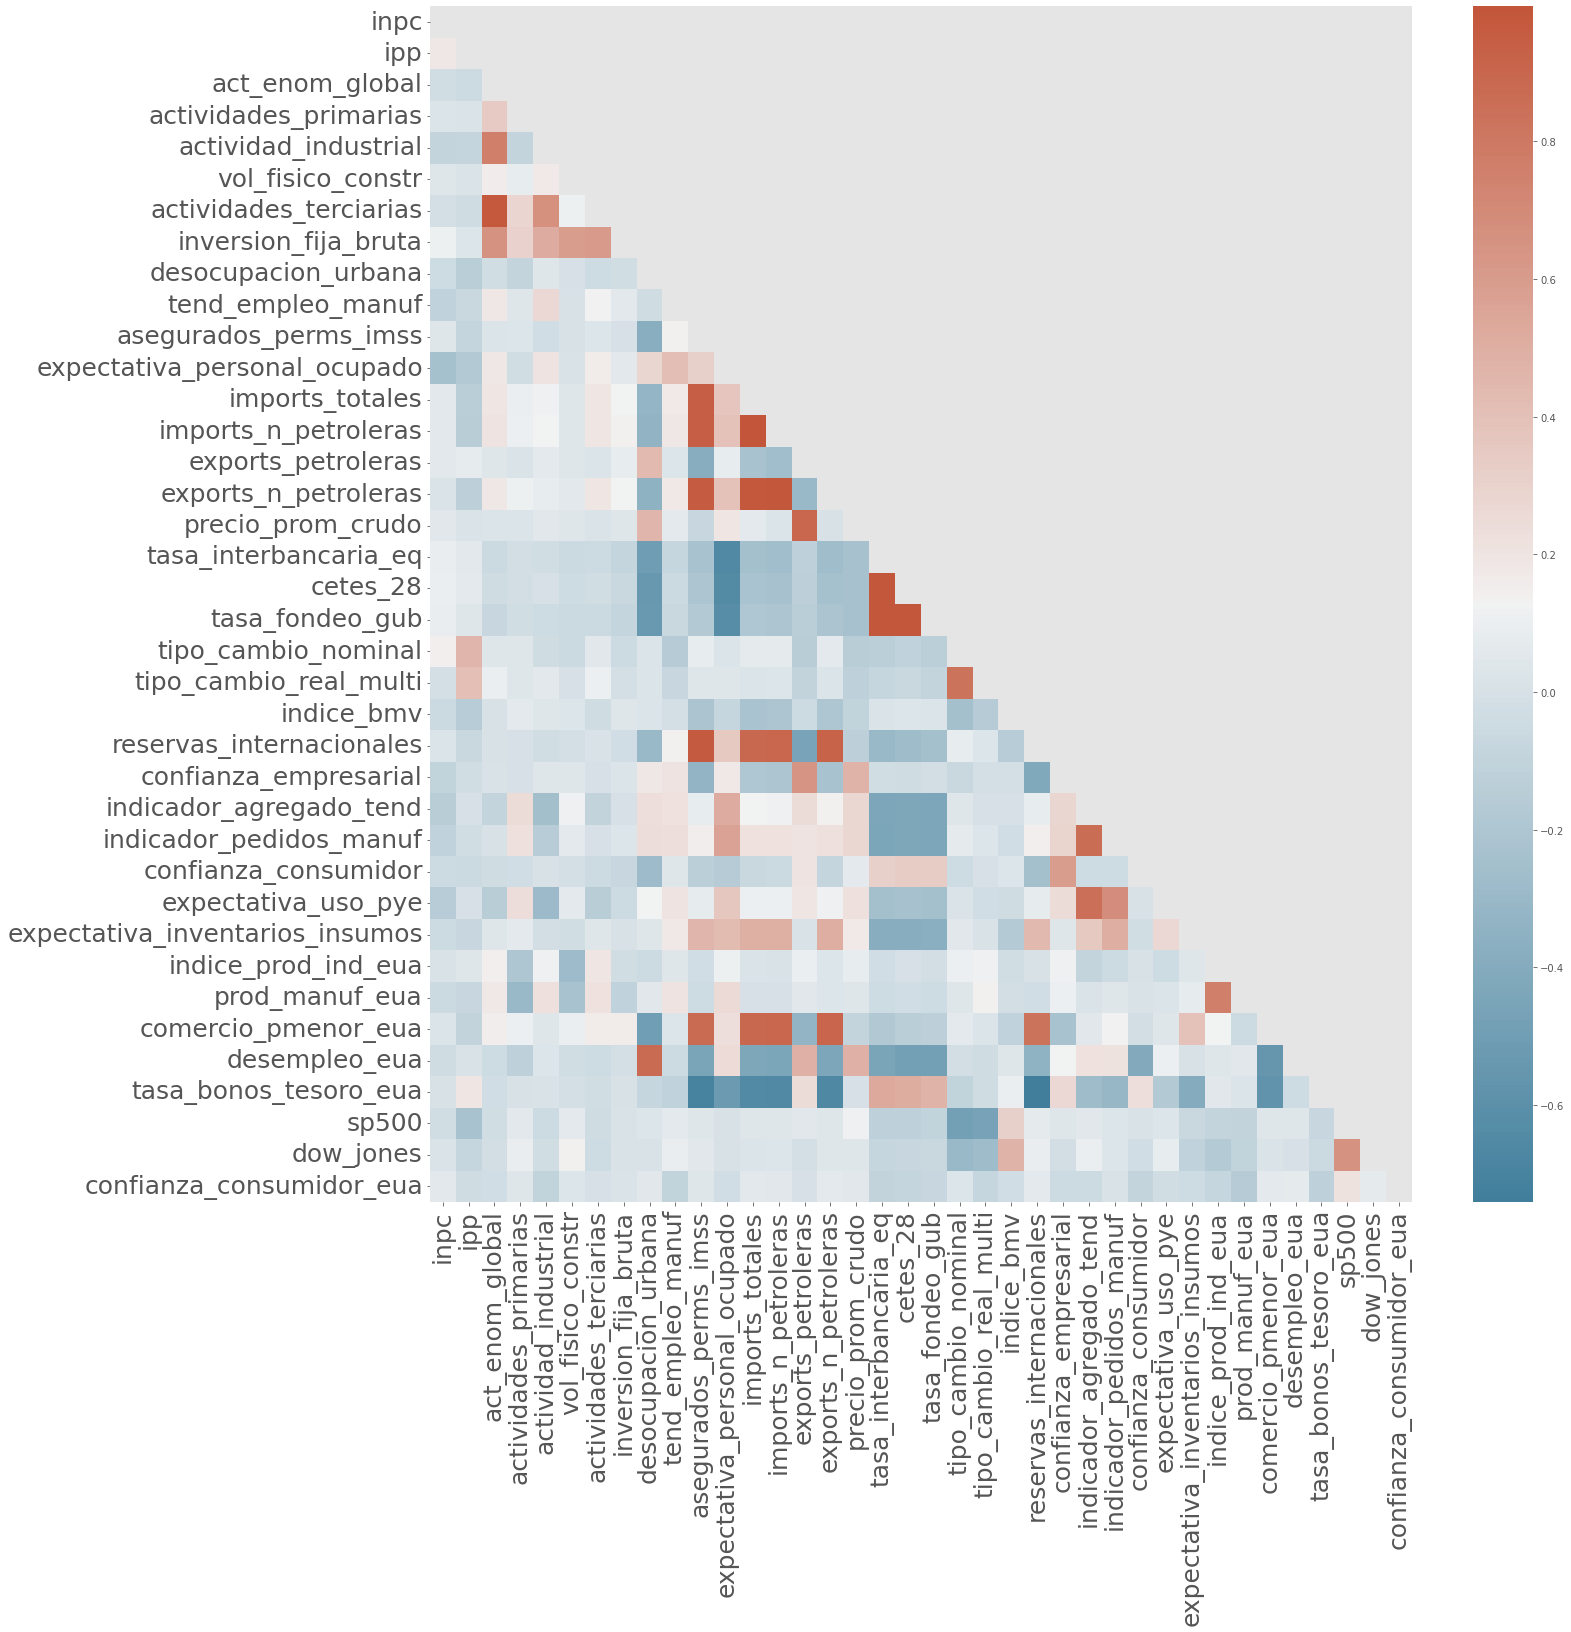

In [11]:
fig, ax = plt.subplots(figsize=(22, 22))

# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(spearman_macro, dtype=bool))

# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(spearman_macro, annot=False, mask = mask, cmap=cmap)

plt.yticks(fontsize=25)
plt.xticks(fontsize=25)

plt.savefig('spearman_macro.png', bbox_inches='tight')

Inflación Subyacente

In [13]:
sabana_analitica_suby = sabana_analitica.drop(['inpc-1','inpc-2','inpc-3','inpc-4',
                                                'inpc-5','inpc-6','inpc-7','inpc-8',
                                                'inpc-9','inpc-10','inpc-11','inpc-12'],
                                               axis = 1).iloc[:,:13]

In [14]:
pearson_suby = sabana_analitica_suby.corr(method = 'pearson')
spearman_suby = sabana_analitica_suby.corr(method = 'spearman')

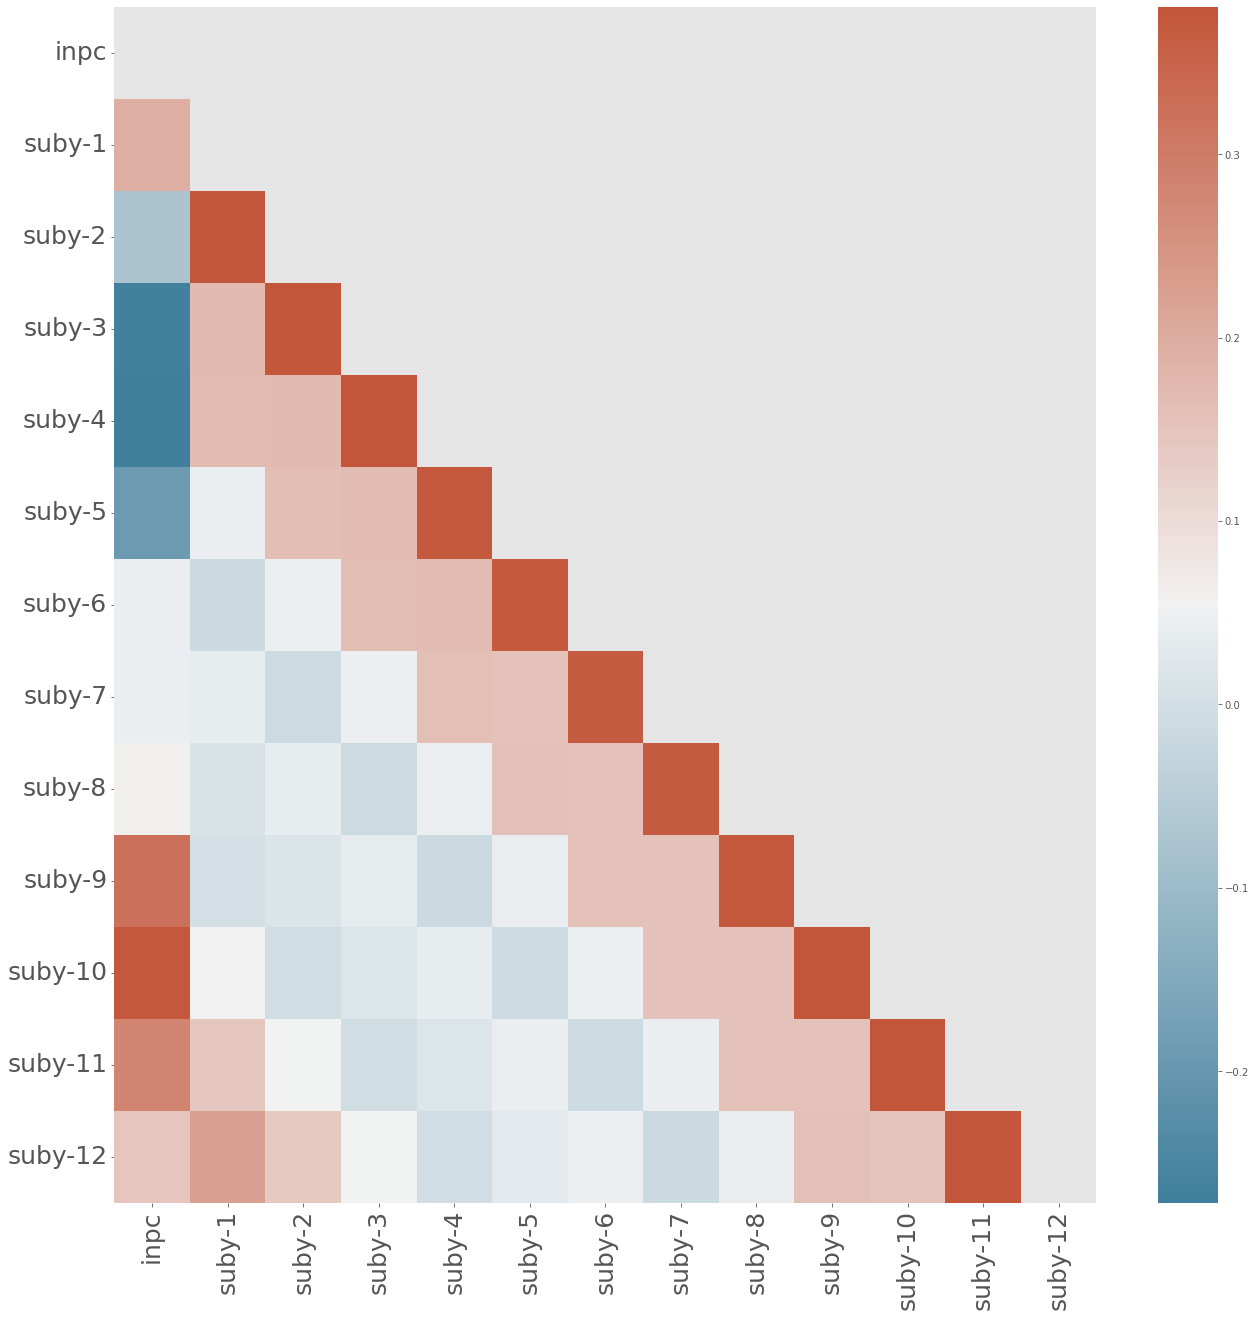

In [24]:
fig, ax = plt.subplots(figsize=(22, 22))

# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(pearson_suby, dtype=bool))

# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(pearson_suby, annot=False, mask = mask, cmap=cmap)

plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=25, rotation=90)

plt.savefig('pearson_suby.png', bbox_inches='tight')

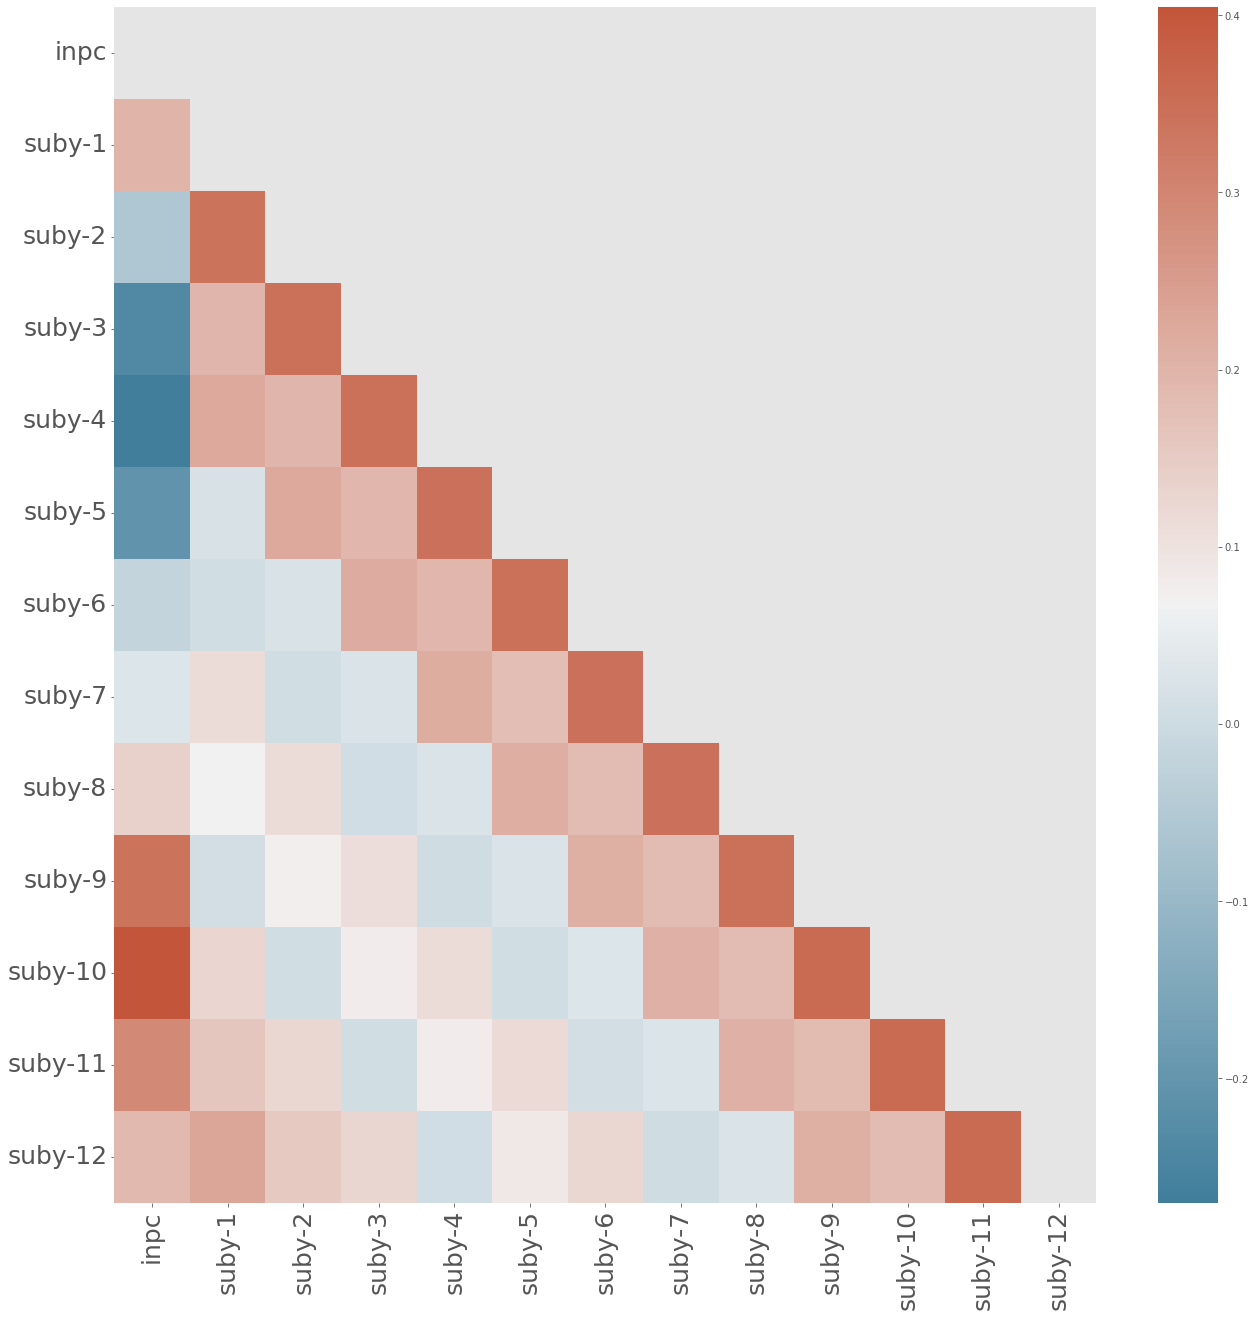

In [25]:
fig, ax = plt.subplots(figsize=(22, 22))

# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(spearman_suby, dtype=bool))

# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(spearman_suby, annot=False, mask = mask, cmap=cmap)

plt.yticks(fontsize=25, rotation=0)
plt.xticks(fontsize=25, rotation=90)

plt.savefig('spearman_suby.png', bbox_inches='tight')

### Autocorrelación

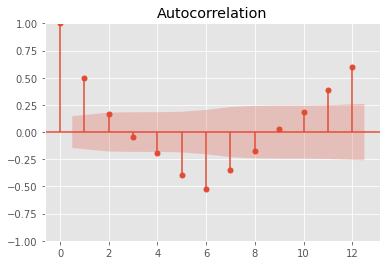

In [263]:
plot_acf(sabana_analitica['inpc'], lags = 12)

plt.savefig('autocorr.png')

### Análisis de Estacionariedad

In [8]:
def test_stationarity(timeseries):
    
    # Determining rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    # Plot rolling statistics:
    plt.figure(figsize=(24, 6))
    orig = plt.plot(timeseries, color='blue',label='Inflación del INPC')
    mean = plt.plot(rolmean, color='red', label='Media Móvil')
    std = plt.plot(rolstd, color='black', label = 'Desv. Est. Móvil')
    plt.legend(loc='best', fontsize = 20)
    tick_positions = timeseries.index[::6]
    plt.xticks(ticks=tick_positions, labels=tick_positions, fontsize=25, rotation=90)
    plt.savefig('dfuller.png', bbox_inches='tight')
    #plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    timeseries = timeseries.values
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.924153
p-value                          0.042611
#Lags Used                      12.000000
Number of Observations Used    167.000000
Critical Value (1%)             -3.470126
Critical Value (5%)             -2.879008
Critical Value (10%)            -2.576083
dtype: float64


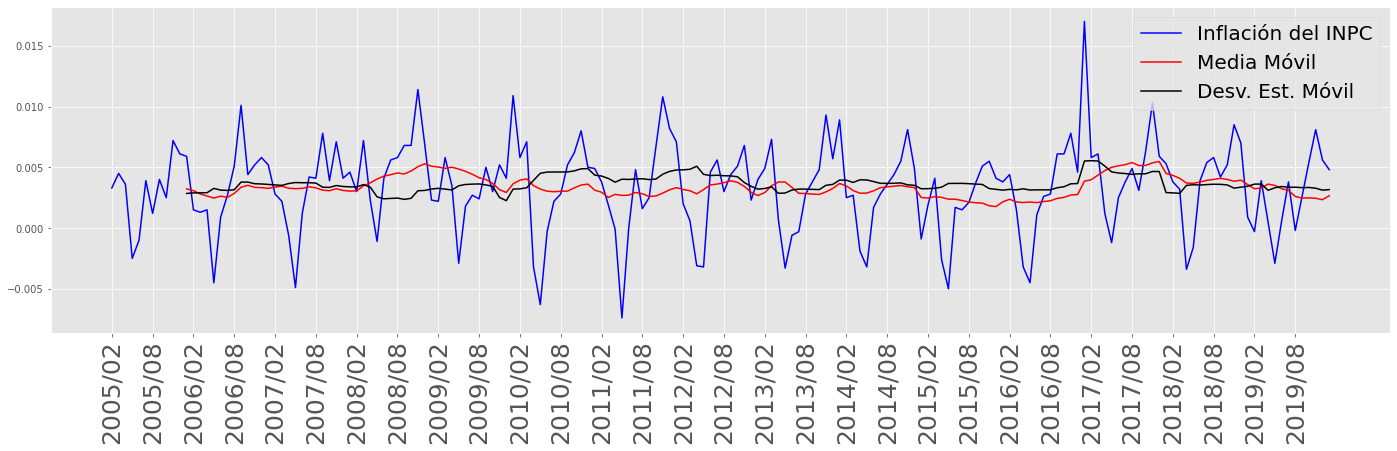

In [9]:
test_stationarity(sabana_analitica['inpc'])